In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [2]:
# # Import the dataset
df = pd.read_csv('Churn_Modelling.csv')
X = df.iloc[:, 3:13].values
y = df.iloc[:, 13].values
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# # Encode the categorical variables
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]
X[:, 1]

array([0., 0., 0., ..., 0., 0., 0.])

In [4]:
# # Split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
# # Scale the data of X train and test
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# # Neural network with Dense and some dropout layers
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 15, activation = 'relu', kernel_initializer ='he_uniform'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units = 20, activation = 'relu', kernel_initializer ='he_uniform'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

In [7]:
ann = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test),)

Epoch 1/100
250/250 [==============================] - 3s 5ms/step - loss: 0.7233 - accuracy: 0.6499 - val_loss: 0.5557 - val_accuracy: 0.7975
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4536 - accuracy: 0.7985 - val_loss: 0.5208 - val_accuracy: 0.7975
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3714 - accuracy: 0.8242 - val_loss: 0.4911 - val_accuracy: 0.7990
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.2828 - accuracy: 0.8652 - val_loss: 0.4651 - val_accuracy: 0.8070
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.2391 - accuracy: 0.8791 - val_loss: 0.4435 - val_accuracy: 0.8210
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.1832 - accuracy: 0.9063 - val_loss: 0.4304 - val_accuracy: 0.8280
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.1583 - accuracy: 0.9145 - val_loss: 0.4196 - val_accuracy: 0.8330

Epoch 58/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0293 - accuracy: 0.9885 - val_loss: 0.5222 - val_accuracy: 0.8330
Epoch 59/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0296 - accuracy: 0.9885 - val_loss: 0.5246 - val_accuracy: 0.8340
Epoch 60/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0298 - accuracy: 0.9893 - val_loss: 0.5266 - val_accuracy: 0.8335
Epoch 61/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0303 - accuracy: 0.9895 - val_loss: 0.5286 - val_accuracy: 0.8335
Epoch 62/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0258 - accuracy: 0.9905 - val_loss: 0.5313 - val_accuracy: 0.8335
Epoch 63/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0321 - accuracy: 0.9876 - val_loss: 0.5328 - val_accuracy: 0.8345
Epoch 64/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0254 - accuracy: 0.9931 - val_loss: 0.5362 - val_accuracy:

Text(0, 0.5, 'Loss')

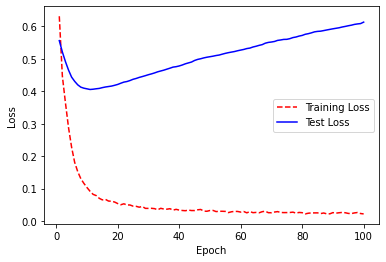

In [8]:
# # Plot the loss of training and validation
training_loss = ann.history['loss']
epoch_count = range(1, len(training_loss) + 1)
test_loss = ann.history['val_loss']
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

AttributeError: 'History' object has no attribute 'predict'